In [1]:
from sympy import *
from sympy.physics.control.lti import TransferFunction

from mna.element.passive import Resistor, Capacitor
from mna.element.active import VoltageSource
from mna.netlist.data import Netlist
from mna.netlist.solver import Solver

init_printing()


## Passive RC low-pass filter

Let's define a simple RC filter circuit. The entrypoint of the library is the "netlist", which is a linear representation of the circuit by specifying its components and connect them to arbitrary nodes.

By convention, ground is node 0.

In [2]:
R, C = symbols('R C', real=True, positive=True)

vin = Symbol('V_in')
net = Netlist(instances=[
    # NOTE: Voltage sources are defined with their positive pin first
    VoltageSource('V1', 1, 0, vin),
    Resistor("R1", 1, 2, R),
    Capacitor("C1", 2, 0, C),
])
solver = Solver(net)

Now we can start manipulating the math. A first step could be to show the derived state matrix:

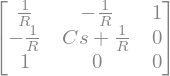

In [3]:
solver.get_matrix()

We can also derive the input vector $\vec{x}$ and output vector $\vec{z}$:

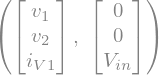

In [4]:
solver.x, solver.z

And we can solve the equation for all variables

In [5]:
from IPython.display import Math
soldict = solver.solve()

# Pretty-display of a list of equations
inner = "\n".join([f"{latex(l)} &= {latex(r)} \\\\" for l,r in soldict.items()])

Math('\\begin{aligned}'+inner+'\\end{aligned}')

<IPython.core.display.Math object>

We can generate a `TransferFunction` from the `sympy.physics.controls.lti` module:

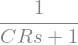

In [6]:
H = solver.transfer_function(vin, net.v[2])
H

The `TransferFunction` is a standard Sympy object, and you can further manipulate it. We can also use other features of the Controls API, for example to show a bode plot or a pole-zero diagram:

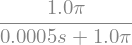

In [7]:
# 1. Compute coefficient for a 1000 Hz RC low-pass filter, and specialize the transfer function
f0 = 1e3
c = 1e-9
r = 1/(2*pi*f0*c)

Hinst = H.subs({R: r, C: c}).simplify()
Hinst

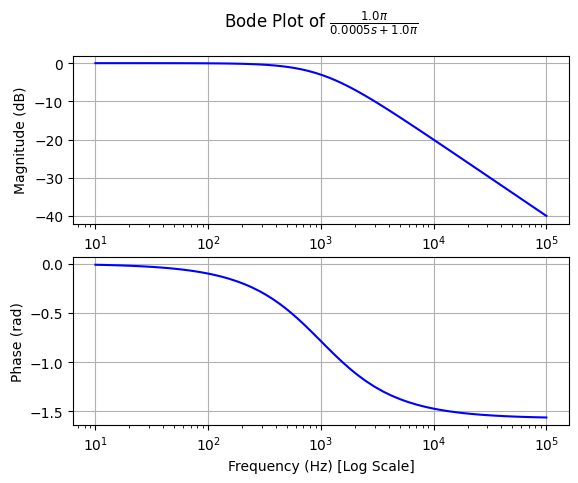

In [8]:
from sympy.physics.control.control_plots import bode_plot, pole_zero_plot

bode_plot(Hinst, initial_exp=1, final_exp=5, freq_unit='Hz')

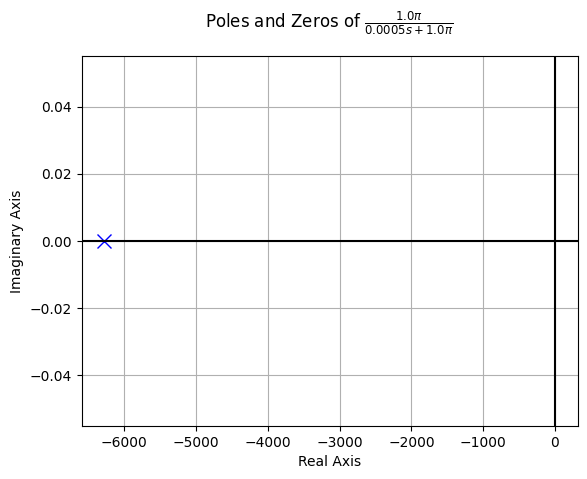

In [9]:
pole_zero_plot(Hinst)